Nama : Achmad Fauzan Nabil <br>
NIM : 211351002 <br>
Kelas : Malam B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"achmadfauzannabil","key":"aff718209c0ffb5e0fe9805c1dbb357b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d unsdsn/world-happiness

  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 32.1MB/s]


In [4]:
!unzip world-happiness.zip -d world-happiness
!ls world-happiness

Archive:  world-happiness.zip
  inflating: world-happiness/2015.csv  
  inflating: world-happiness/2016.csv  
  inflating: world-happiness/2017.csv  
  inflating: world-happiness/2018.csv  
  inflating: world-happiness/2019.csv  
2015.csv  2016.csv  2017.csv  2018.csv	2019.csv


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
from math import pi

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import plotly.express as px

In [7]:
from sklearn.cluster import KMeans

In [8]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# Data Discovery

In [9]:
df = pd.read_csv('/content/world-happiness/2019.csv')

In [10]:
print("Dimensi dataframe", df.shape)
df.head()

Dimensi dataframe (156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Kita lihat informasi dari data kita, disini kita memiliki datatype object tapi tidak apa karena tidak akan kita digunakan pada proses modeling



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Disini kita lihat ringkasan statistikk tiap data seperti jumlah, rata-rata, min dan max

In [12]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Pada data ini kita tidak menemukan data null dan itu bagus

In [13]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Tidak ada data duplikat semua data unik pada dataset ini

In [14]:
df.duplicated().sum()

0

# EDA (minimal 5)

Heatmap antar kolom, kita lihat GDP per capita, social support dan healt life expceptancy memiliki korelasi paling tinggi pada score happines dari sebuah negara

<Axes: >

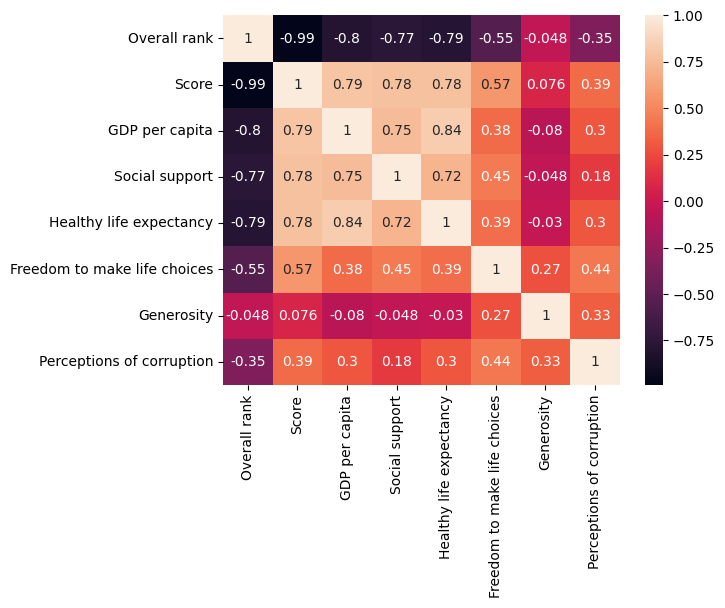

In [15]:
sns.heatmap(df.corr(), annot=True)

Menampilkan 10 negara dengan rasio bahagia tertinggi

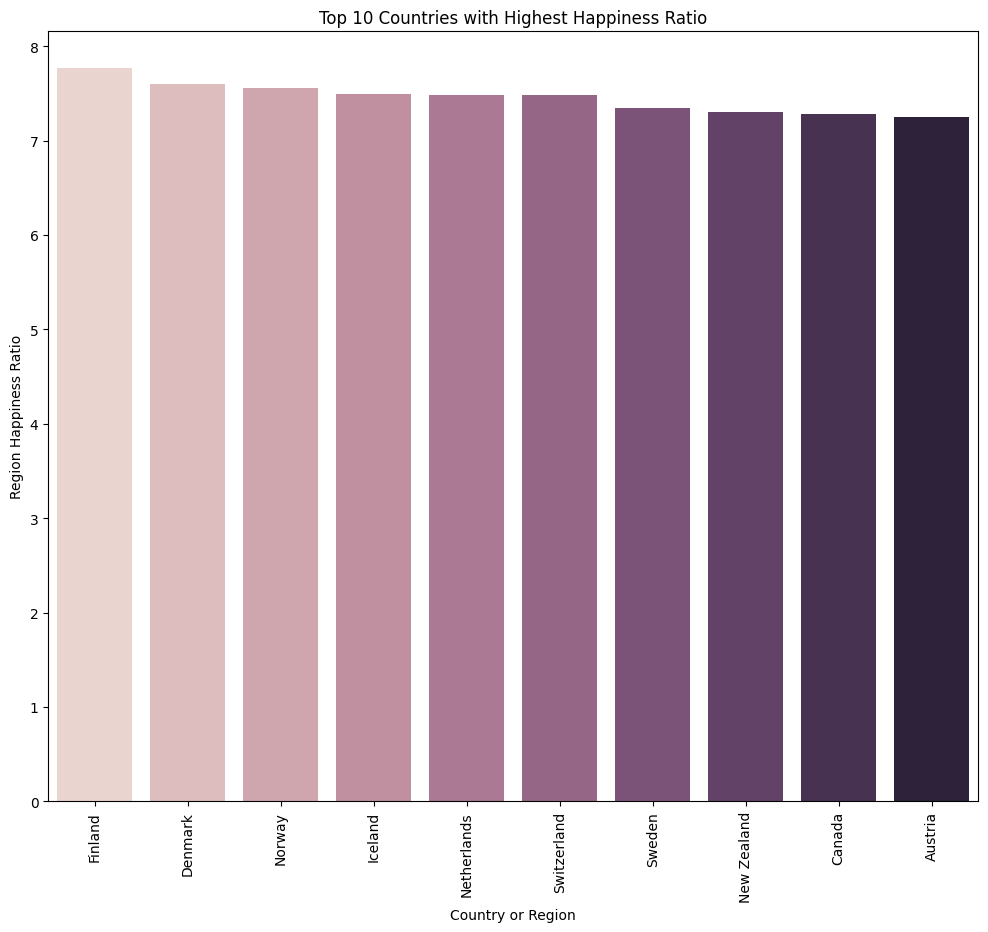

In [16]:
region_happiness = df.groupby('Country or region')['Score'].mean().sort_values(ascending=False)

top_10_regions = region_happiness.head(10)

plt.figure(figsize=(12,10))
sns.barplot(x=top_10_regions.index, y=top_10_regions.values, palette=sns.cubehelix_palette(10))
plt.xticks(rotation=90)
plt.xlabel('Country or Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Top 10 Countries with Highest Happiness Ratio')
plt.show()


Menampilkan 10 negara dengan GDP percapita tertinggi

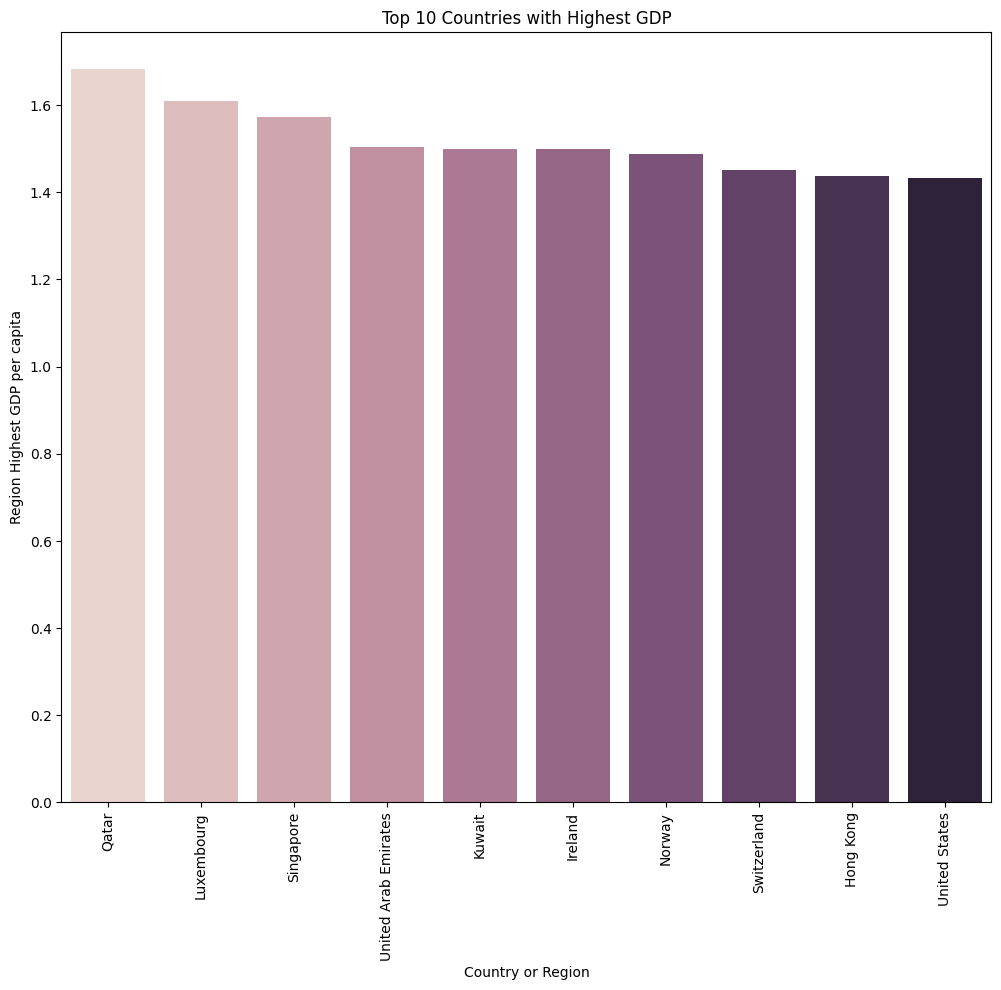

In [17]:
highest_gdp = df.groupby('Country or region')['GDP per capita'].mean().sort_values(ascending=False)

top_10_regions = highest_gdp.head(10)

plt.figure(figsize=(12,10))
sns.barplot(x=top_10_regions.index, y=top_10_regions.values, palette=sns.cubehelix_palette(10))
plt.xticks(rotation=90)
plt.xlabel('Country or Region')
plt.ylabel('Region Highest GDP per capita')
plt.title('Top 10 Countries with Highest GDP')
plt.show()

Semakin GDP per capita tinggi semakin tinggi kebahagiaan sebuah negara

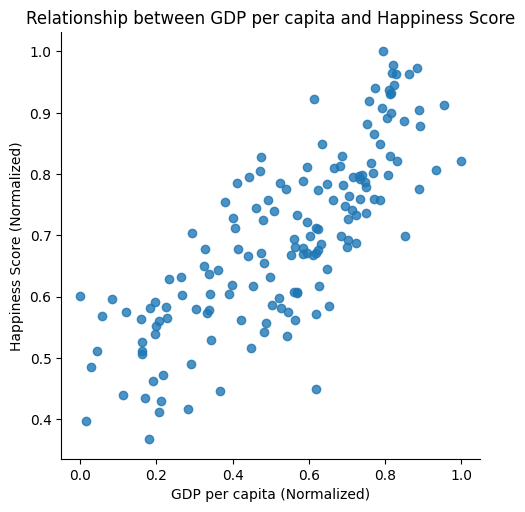

In [18]:
dataframe2 = pd.pivot_table(df, index='Country or region', values=["Score", "GDP per capita"])

dataframe2["Score"] = dataframe2["Score"] / max(dataframe2["Score"])
dataframe2["GDP per capita"] = dataframe2["GDP per capita"] / max(dataframe2["GDP per capita"])

# Menggunakan regplot untuk menggambarkan hubungan antara "GDP per capita" dan "Score"
sns.lmplot(x="GDP per capita", y="Score", data=dataframe2, fit_reg=False)
plt.xlabel('GDP per capita (Normalized)')
plt.ylabel('Happiness Score (Normalized)')
plt.title('Relationship between GDP per capita and Happiness Score')
plt.show()

Persepsi korupsi atau kepercayaan masyarakat terhadap pemerintah memiliki efek negatif yang cukup signifikan

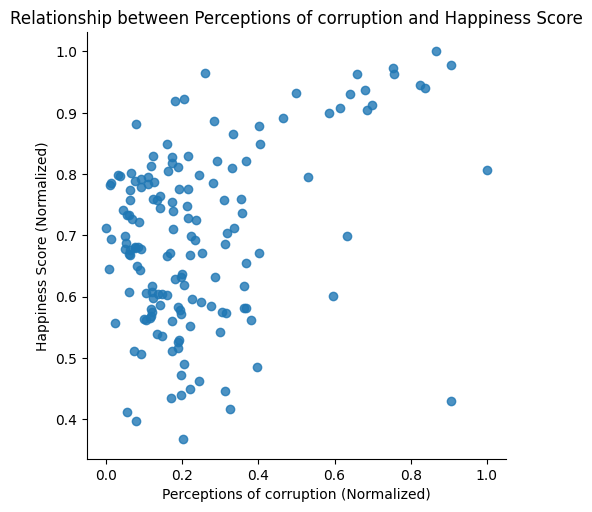

In [19]:
dataframe2 = pd.pivot_table(df, index='Country or region', values=["Score", "Perceptions of corruption"])

dataframe2["Score"] = dataframe2["Score"] / max(dataframe2["Score"])
dataframe2["Perceptions of corruption"] = dataframe2["Perceptions of corruption"] / max(dataframe2["Perceptions of corruption"])

# Menggunakan regplot untuk menggambarkan hubungan antara "Perceptions of corruption" dan "Score"
sns.lmplot(x="Perceptions of corruption", y="Score", data=dataframe2, fit_reg=False)
plt.xlabel('Perceptions of corruption (Normalized)')
plt.ylabel('Happiness Score (Normalized)')
plt.title('Relationship between Perceptions of corruption and Happiness Score')
plt.show()

# Preprocessing

Pada tahap ini kita pastikan tidak ada data null dan data duplikat

In [20]:
df.dropna(inplace=True)
df.duplicated().sum()

0

Karena kita tidak mau menggunakan semua kolom pada dataframe jadi kita akan membuat dataframe baru untuk modelingnya

In [21]:
x = df.loc[:, ["Score", "GDP per capita", "Social support", "Perceptions of corruption"]]
x

,Score,GDP per capita,Social support,Perceptions of corruption
0,7.769,1.340,1.587,0.393
1,7.600,1.383,1.573,0.410
2,7.554,1.488,1.582,0.341
3,7.494,1.380,1.624,0.118
4,7.488,1.396,1.522,0.298
...,...,...,...,...
151,3.334,0.359,0.711,0.411
152,3.231,0.476,0.885,0.147
153,3.203,0.350,0.517,0.025
154,3.083,0.026,0.000,0.035


# modeling

Proses preprocessing selesai selanjutnya kita akan mencari elbow untuk dijadikan angka cluster, bisa kita lihat elbow yang memungkinkan adalah 4 dan 5

Text(5, 150, 'Possible elbow point')

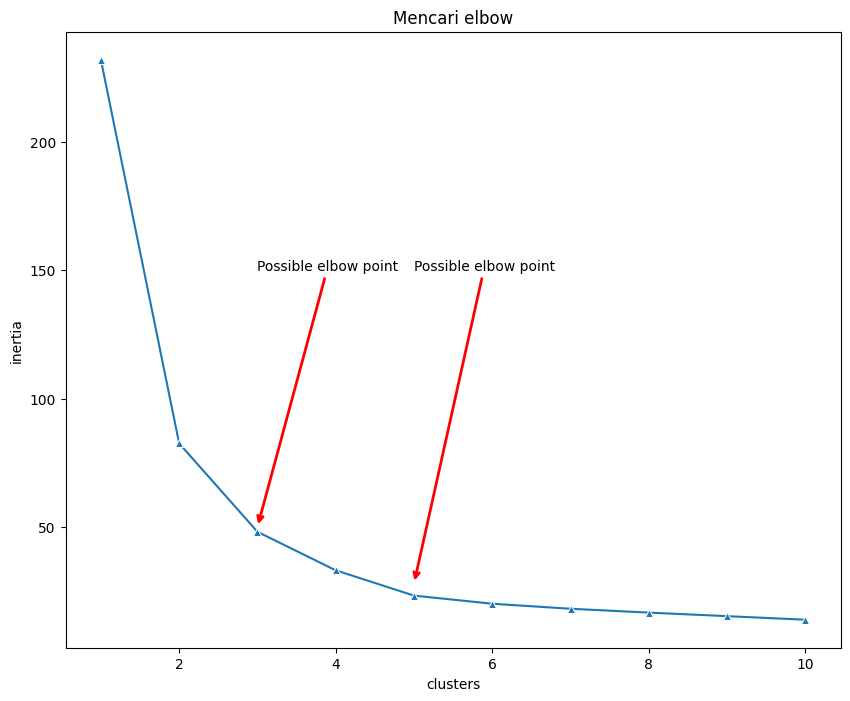

In [22]:
k = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(x)
    k.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x=list(range(1,11)), y=k, ax=ax, marker='^')
ax.set_title("Mencari elbow")
ax.set_xlabel("clusters")
ax.set_ylabel("inertia")

ax.annotate("Possible elbow point", xy=(3,50), xytext=(3, 150), xycoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="red", lw=2),
            annotation_clip=False
            )
ax.annotate("Possible elbow point", xy=(5, 28), xytext=(5, 150), xycoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="red", lw=2),
            annotation_clip=False
            )

Bisa kita lihat possible elbownya pointnya berada dari 3 sampai 5 kita akan ambil 4 karena 4 mewakili keduanya


In [24]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(x)
x["Labels"] = kmean.labels_

# Visualisasi hasil algoritma

Model kita sudah di kelompokan menjadi 4 cluster

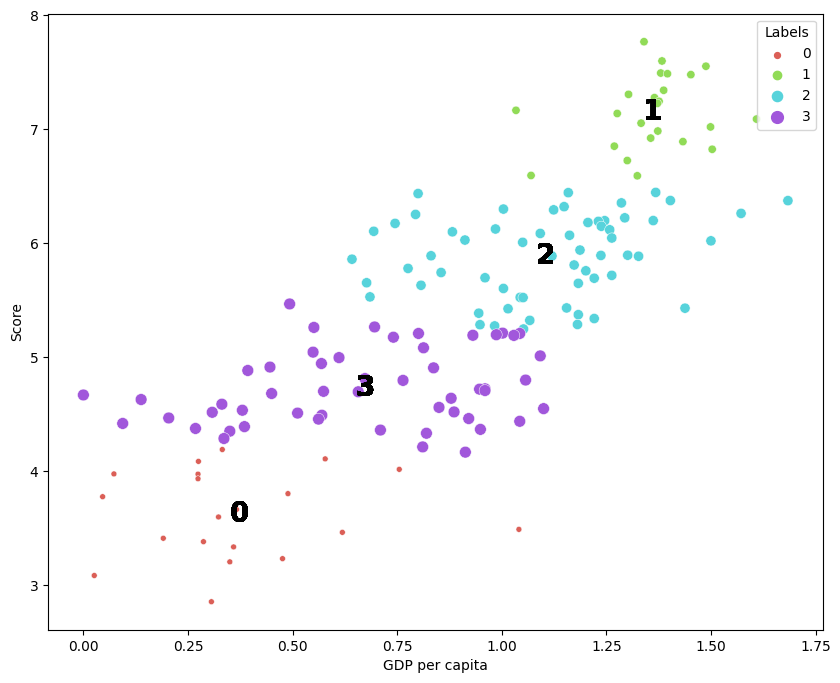

In [25]:
plt.figure (figsize=(10,8))
sns.scatterplot(x='GDP per capita', y='Score', hue='Labels', size='Labels', palette=sns.color_palette('hls', n_clust), data=x, markers=True)

for label in x['Labels']:
  plt.annotate (label,
  (x[x['Labels']==label]['GDP per capita'].mean(),
   x[x['Labels'] ==label]['Score'].mean()),
   horizontalalignment = 'center',
   verticalalignment = 'center',
   size = 20, weight='bold',
   color = 'black')

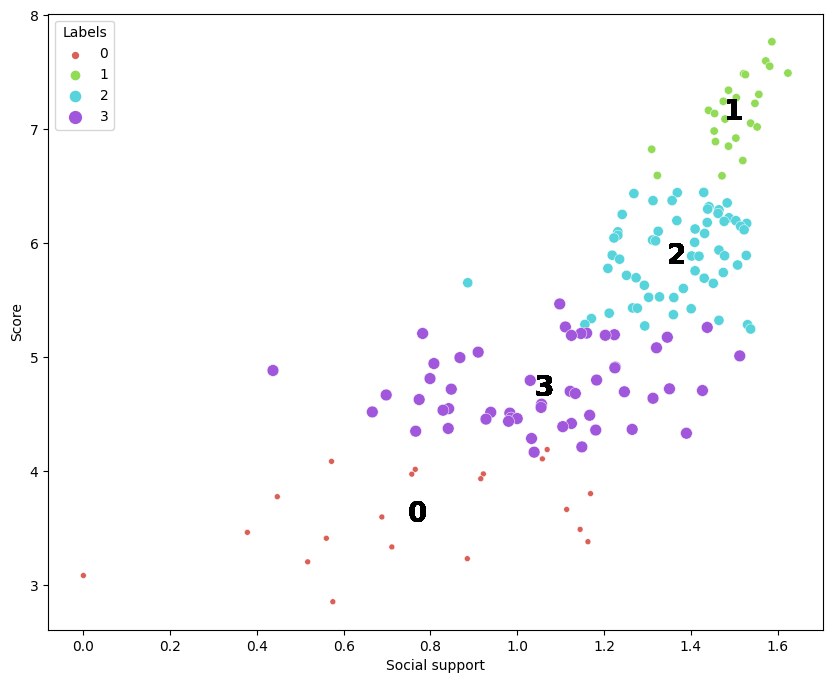

In [26]:
plt.figure (figsize=(10,8))
sns.scatterplot(x='Social support', y='Score', hue='Labels', size='Labels', palette=sns.color_palette('hls', n_clust), data=x, markers=True)

for label in x['Labels']:
  plt.annotate (label,
  (x[x['Labels']==label]['Social support'].mean(),
   x[x['Labels'] ==label]['Score'].mean()),
   horizontalalignment = 'center',
   verticalalignment = 'center',
   size = 20, weight='bold',
   color = 'black')

Tampilkan data setelah di beri label

In [27]:
print(x)

     Score  GDP per capita  Social support  Perceptions of corruption  Labels
0    7.769           1.340           1.587                      0.393       1
1    7.600           1.383           1.573                      0.410       1
2    7.554           1.488           1.582                      0.341       1
3    7.494           1.380           1.624                      0.118       1
4    7.488           1.396           1.522                      0.298       1
..     ...             ...             ...                        ...     ...
151  3.334           0.359           0.711                      0.411       0
152  3.231           0.476           0.885                      0.147       0
153  3.203           0.350           0.517                      0.025       0
154  3.083           0.026           0.000                      0.035       0
155  2.853           0.306           0.575                      0.091       0

[156 rows x 5 columns]


Memampilkan nilai rata-rata dari setiap label

In [28]:
km_mean = x.groupby(['Labels']).mean().round(2)
km_mean

,Score,GDP per capita,Social support,Perceptions of corruption
Labels,,,,
0,3.63,0.37,0.77,0.10
1,7.15,1.36,1.50,0.24
2,5.89,1.10,1.37,0.08
3,4.73,0.67,1.06,0.09


# save model (csv)

In [29]:
x.to_csv("output_cluster.csv")